In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import random
import math
import pandas as pd
from datetime import date, datetime
import seaborn as sns

In [ ]:
random.seed(123456)
plt.rcParams.update({'font.size': 12})
np.set_printoptions(precision=6, suppress=True)
directory = '/content/drive/MyDrive/programowanie/'

# Dane podstawowe

## Ładowanie danych

In [ ]:
data_file = open(directory + 'train.csv')
data = pd.read_csv(data_file)
data_file.close()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Przekonwertowanie typów

In [ ]:
def convert_object_to_str(data):
  data['StateHoliday'] = data['StateHoliday'].astype('str').convert_dtypes()
  data['Date'] = data['Date'].astype('str').convert_dtypes()
  return data

In [ ]:
data = convert_object_to_str(data)

## Wgląd w podstawowe dane

Wyjściowy zbiór danych o sprzedaży w sklepach skład się z $1017209$ wierszy, w których są zawarte informacje o wynikach sprzedaży danego dnia w wybranym sklepie. Zbiór składa się z poniższych $8$ kolumn:
1. Store - Sklep;
2. Day of week;
3. Sales;
4. Customers;
5. Open;
6. Promo;
7. State Holiday - państwowe wakacje (typ to string), zawierające wartości: ['0', 'a', 'b', 'c'];
8. School Holiday.

In [ ]:
data.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1


Rozkład danych w zbiorze danych można zobaczyć na histogramach.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6cf50e77f0>,
      dtype=object)

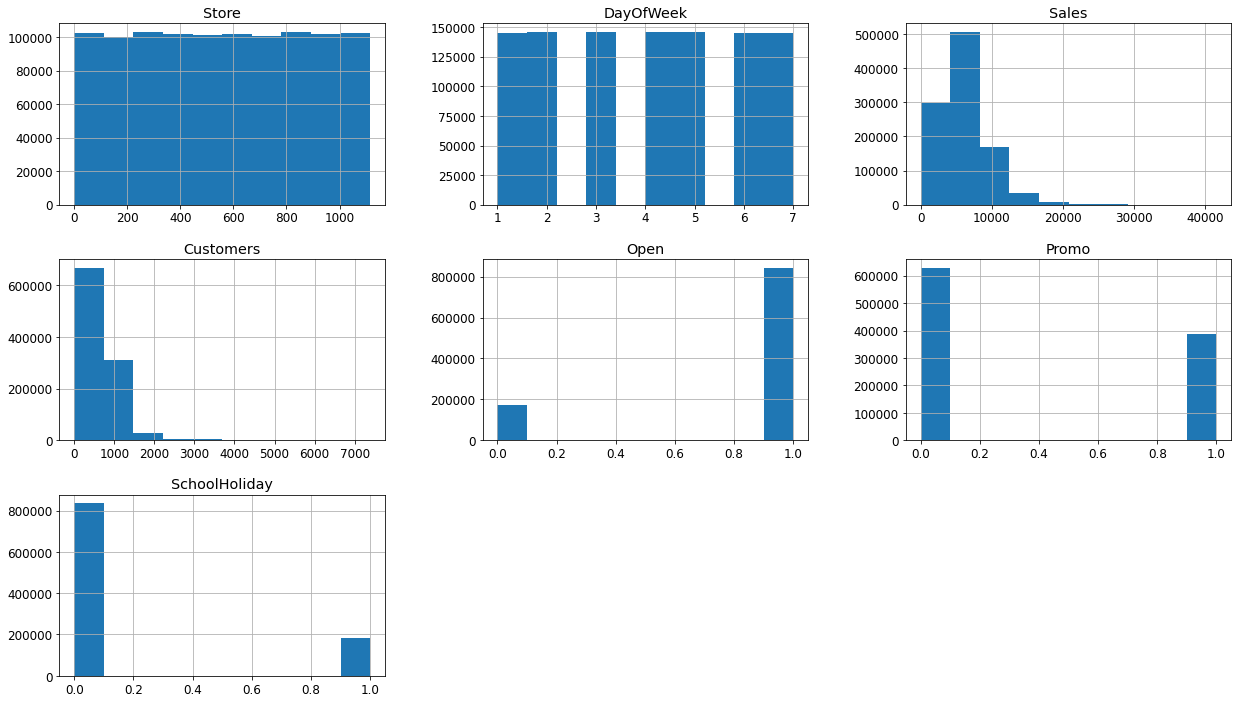

In [ ]:
data.hist(figsize=(21,12))

Podobnie z korelacją pomiędzy poszczególnymi kolumnami.

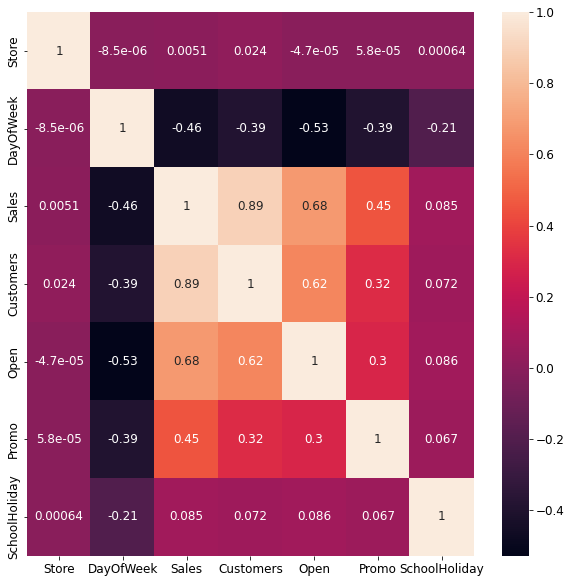

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data = data.corr(), annot=True, ax=ax)

# Modyfikacja danych

## Dodanie kolumn z dniem, miesiącem oraz rokiem

In [ ]:
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Day'] = pd.DatetimeIndex(data['Date']).day

## Zamiana formatu zapisu dni i miesięcy

Zamiana dni tygodnia na wartości sinus i cosinus

In [ ]:
data["Day_week_norm"] = 2 * math.pi * data["DayOfWeek"] / data["DayOfWeek"].max() #normalizacja
data["cos_day_week"]=np.cos(data["Day_week_norm"])
data["sin_day_week"]=np.sin(data["Day_week_norm"])

Zamiana dni miesiąca na wartości sinus i cosinus

In [ ]:
data["Day_month_norm"] = 2 * math.pi * data["Day"] / data["Day"].max() #normalizacja
data["cos_day_month"]=np.cos(data["Day_month_norm"])
data["sin_day_month"]=np.sin(data["Day_month_norm"])

Zamiana miesiący na wartości sinus i cosinus

In [ ]:
data["Month_norm"] = 2 * math.pi * data["Month"] / data["Month"].max() #normalizacja
data["cos_month"]=np.cos(data["Month_norm"])
data["sin_month"]=np.sin(data["Month_norm"])

## Wydobycie dat świąt

Metody pomocnicze

In [ ]:
def days_between(d1, d2):
  d1 = datetime.strptime(d1, "%Y-%m-%d")
  d2 = datetime.strptime(d2, "%Y-%m-%d")
  return (d2 - d1).days

In [ ]:
def find_closest_past(d1, list):
  for date_holiday in list:
    diff = days_between(d1, date_holiday)
    if diff >= 0:
      return diff
      break

Święta państwowe

In [ ]:
holiday_a = data.loc[data['StateHoliday'] == 'a'].Date.unique()
holiday_a = np.sort(np.hstack([holiday_a, ['2015-10-03', '2015-10-31', '2015-11-01', '2014-11-18', '2016-01-01', '2016-01-06', '2016-05-01']]))
holiday_a

array(['2013-01-01', '2013-01-06', '2013-05-01', '2013-05-09',
       '2013-05-20', '2013-05-30', '2013-08-15', '2013-10-03',
       '2013-10-31', '2013-11-01', '2013-11-20', '2014-01-01',
       '2014-01-06', '2014-05-01', '2014-05-29', '2014-06-09',
       '2014-06-19', '2014-10-03', '2014-10-31', '2014-11-01',
       '2014-11-18', '2014-11-19', '2015-01-01', '2015-01-06',
       '2015-05-01', '2015-05-14', '2015-05-25', '2015-06-04',
       '2015-10-03', '2015-10-31', '2015-11-01', '2016-01-01',
       '2016-01-06', '2016-05-01'], dtype=object)

Daty te jeszcze można porozdzielać na osobne wydarzenia/święta. Jednak to będzie do testu, bo może to być mało wnoszące rozwinięcie zbioru.

Święta Wielkanocne

In [ ]:
holiday_b = data.loc[data['StateHoliday'] == 'b'].Date.unique()
holiday_b = np.sort(np.hstack([holiday_b, ['2016-03-25', '2016-03-28']]))
holiday_b

array(['2013-03-29', '2013-04-01', '2014-04-18', '2014-04-21',
       '2015-04-03', '2015-04-06', '2016-03-25', '2016-03-28'],
      dtype=object)

Święta Bożego Narodzenia

In [ ]:
holiday_c = data.loc[data['StateHoliday'] == 'c'].Date.unique()
holiday_c = np.sort(np.hstack([holiday_c, ['2016-12-26', '2016-12-25', '2015-12-26', '2015-12-25']]))
holiday_c

array(['2013-12-25', '2013-12-26', '2014-12-25', '2014-12-26',
       '2015-12-25', '2015-12-26', '2016-12-25', '2016-12-26'],
      dtype=object)

Dodanie kolumn z ilością dni do następnego święta

In [ ]:
days_till_a = []
days_till_b = []
days_till_c = []
for index, row in data.iterrows():
  day = row['Date']
  if index % 50000 == 0:
    print(index)
  days_till_a.append(find_closest_past(day, holiday_a))
  days_till_b.append(find_closest_past(day, holiday_b))
  days_till_c.append(find_closest_past(day, holiday_c))
data['Till_a'] = days_till_a
data['Till_b'] = days_till_b
data['Till_c'] = days_till_c

Zapisanie nowych danych

In [ ]:
# data.to_csv(directory + 'new_data.csv', index=False)

# Dane rozbudowane

### Wczytanie nowych danych

In [ ]:
data_file = open(directory + 'new_data.csv')
data_new = pd.read_csv(data_file)
data_file.close()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data_new = convert_object_to_str(data_new)
data_new = data_new.drop(["DayOfWeek", "Date", "StateHoliday", "Month", "Day", "Day_week_norm", "Day_month_norm", "Month_norm"], axis=1)

## Wgląd w rozbudowane dane

In [ ]:
data_new.head(3)

,Store,Sales,Customers,Open,Promo,SchoolHoliday,Year,cos_day_week,sin_day_week,cos_day_month,sin_day_month,cos_month,sin_month,Till_a,Till_b,Till_c
0,1,5263,555,1,1,1,2015,-0.222521,-0.974928,1.0,-2.449294e-16,-0.866025,-0.5,64,238,147
1,2,6064,625,1,1,1,2015,-0.222521,-0.974928,1.0,-2.449294e-16,-0.866025,-0.5,64,238,147
2,3,8314,821,1,1,1,2015,-0.222521,-0.974928,1.0,-2.449294e-16,-0.866025,-0.5,64,238,147


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6cf11e3a30>,
      dtype=object)

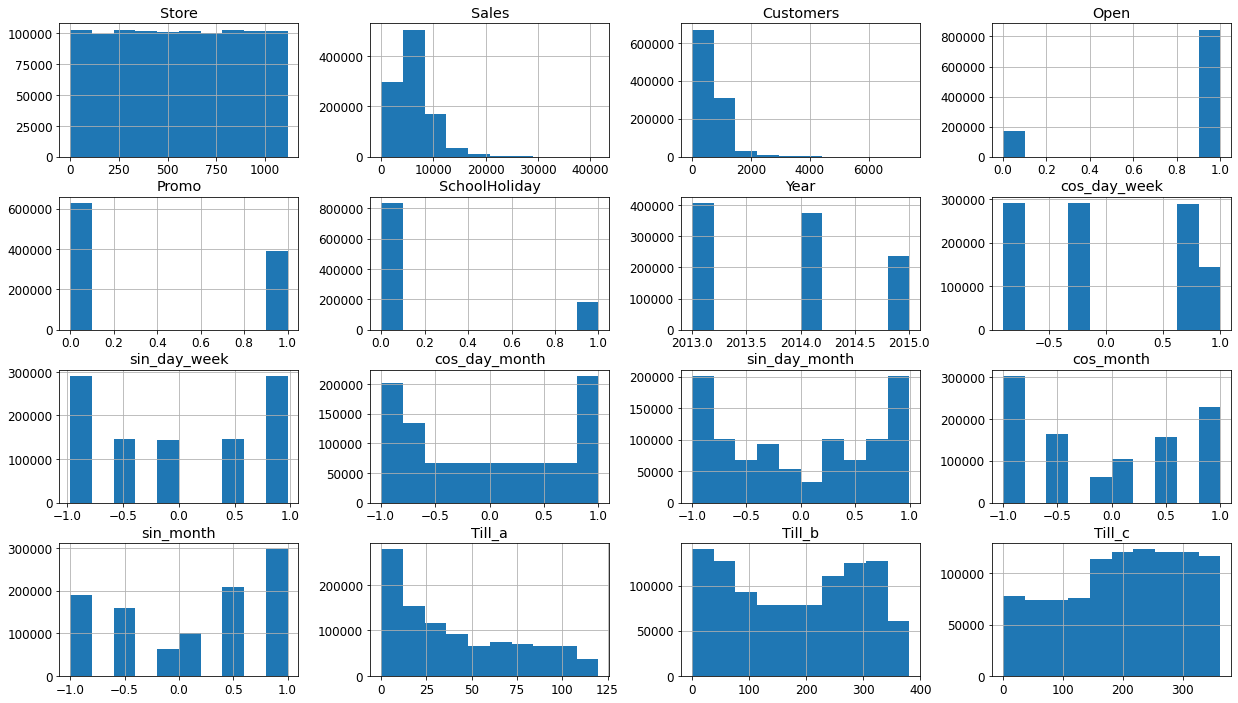

In [ ]:
data_new.hist(figsize=(21,12))

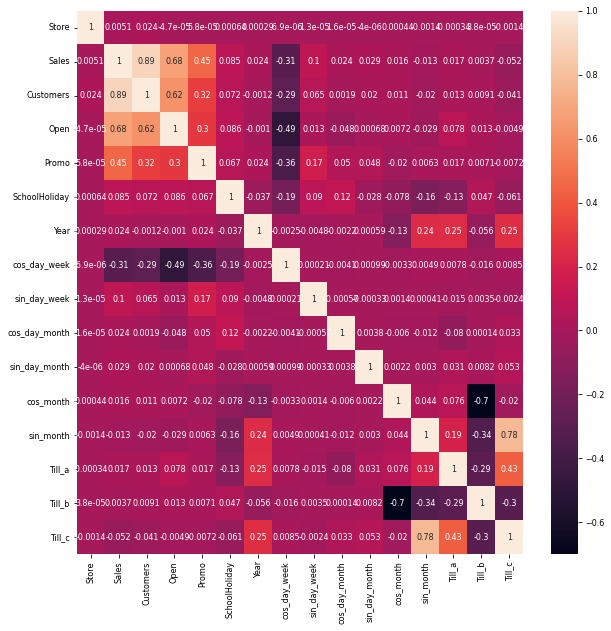

In [ ]:
plt.rcParams.update({'font.size': 8})
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data = data_new.corr(), annot=True, ax=ax)
plt.rcParams.update({'font.size': 12})

# Analiza zbioru

In [ ]:
data_new.info() #typ, liczba nulli, ilosc wierszy

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 16 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Store          1017209 non-null  int64  
 1   Sales          1017209 non-null  int64  
 2   Customers      1017209 non-null  int64  
 3   Open           1017209 non-null  int64  
 4   Promo          1017209 non-null  int64  
 5   SchoolHoliday  1017209 non-null  int64  
 6   Year           1017209 non-null  int64  
 7   cos_day_week   1017209 non-null  float64
 8   sin_day_week   1017209 non-null  float64
 9   cos_day_month  1017209 non-null  float64
 10  sin_day_month  1017209 non-null  float64
 11  cos_month      1017209 non-null  float64
 12  sin_month      1017209 non-null  float64
 13  Till_a         1017209 non-null  int64  
 14  Till_b         1017209 non-null  int64  
 15  Till_c         1017209 non-null  int64  
dtypes: float64(6), int64(10)
memory usage: 124.2 MB


In [ ]:
data_new.skew() # skośność rozkładów

Store           -0.000955
Sales            0.641460
Customers        1.598650
Open            -1.758045
Promo            0.487838
SchoolHoliday    1.677842
Year             0.300265
cos_day_week     0.005373
sin_day_week     0.000555
cos_day_month    0.029372
sin_day_month   -0.007603
cos_month        0.131075
sin_month       -0.260980
Till_a           0.603815
Till_b          -0.037295
Till_c          -0.276615
dtype: float64

Uzyskane wyniki interpretuj w sposób następujący: \\
• Współczynnik o wartości 0, to rozkład symetryczny. \\
• Współczynnik o wartości ujemnej to rozkład lewostronnie skośny (wydłużone lewe
ramię rozkładu; średnia mniejsza od mediany). \\
• Współczynnik o wartości dodatniej to rozkład prawostronnie skośny (wydłużone
prawe ramię rozkładu; średniej większa od mediany).


# Tworzenie modeli

Celem predykcji, jest na postawie znajomości pewnych danych $X$ przewidzieć jak zmienia się pewna wartość $y$. Zmienne na których bazujemy naszą predykcję nazywamy zmiennymi objaśniającymi, a zmienną której wartość przewidujemy nazywamy zmienną objaśnianą.

## Przedstawienie używanych modeli

Przypomnienie:


*   $L_1$ - norma taksówkowa, tj. 
$||x|| _1 := \sum _{i=1}^{n} |x_i| $

*   $L_2$ - norma euklidesowa, tj. 
$||x||_2 := \sqrt{x_{1}^{2} + ... + x_n^2} $ 

### Regresja liniowa

W modelu tym zakładamy, że istnieje liniowa zależnośc między zmiennymi objaśniającymi, a zmienną objaśnianą i realcja ta wygląda nastepująco
$$y = X\cdot w + \epsilon,$$
gdzie $\epsilon$ są resztkami modelu o rozkładzie normalnym.

Model regresji liniowej bazuje na wyliczaniu wartości zmiennej objaśnianej za pomocą kombinacji liniowej zmiennych objaśniających, oraz wektora wag
$$\hat{y} = X\cdot w$$

Posługując się kwadratową funkcją straty, zadaniem regresji liniowej jest zminimalizowanie wartości funkcji postaci
$$L(w) = \sum_{i=1}^{n}(\hat{y_i}-y_i)^2 = ||\hat{y}-y||_{L_2}^2 = ||X\cdot w-y||_{L_2}^2=||\epsilon||_{L_2}^2,$$
gdzie $n$ to liczba obserwacji w naszej próbce.

### Regresja Lasso

**Regresja Lasso** jest zmodyfikowaniem regresji liniowej poprzez dodanie do funkcji straty dodatkowego czynnika zależącego od wag. Wówczas minimalizowana przez model funkcja straty ma postać
$$L(w) = \frac{||Xw-y||_{L_2}^2}{2n} + \alpha||w||_{L_1}=\frac{||\epsilon||_{L_2}^2}{2n} + \alpha||w||_{L_1}$$,
gdzie $\alpha$ to parametr regularyzacji.

Podejście takie nazywamy regularyzacją, gdyż dokładana kara $\text{L}1$ karze model za dobieranie zbyt dużych wag i redukuje ryzyko "overfittingu" modelu.

### Regresja Elastic Net

Regresja Elastic Net (EN) jest kolejną modyfikacją regresji liniowej. Poza dokładaną wcześniej karą $\text{L}1$ jest również dokładna kara $\text{L}2$, która sprawia że nasza funkcja straty staje się funkcją kwadratową. Wówczas minimalizowana przez model funkcja straty ma postać
$$L(w) = \frac{||\epsilon||_{L_2}^2}{2n} + \alpha_1||w||_{L_1} + \alpha_2||w||_{L_2}^2$$,
gdzie $\alpha_1$ oraz $\alpha_2$ to parametry regularyzacji odpowiedzialne za odpowiednio kary $\text{L}1$ oraz $\text{L}2$.

Podejście takie nazywamy regularyzacją, gdyż dokładana kara $\text{L}1$ karze model za dobieranie zbyt dużych wag i redukuje ryzyko "overfittingu" modelu.

## Charakterystyka modeli

Regresja liniowa, przez wzgląd na swoją prostotę, jest najszybciej obliczalnym modelem ze wszystkich tutaj wymienionych. Dla modeli Lasso oraz EN, dokładanie kolejnych wyrazów do funkcji straty powoduje, że obliczenia te zajmują więcej czasu, jednak nadal jest to porównywalnie krótki czas. Dodatkowo Ich interpretacja jest bardzo prosta:

*   Regresja liniowa szuka prostej która najbardziej pasuje do punktów danych i  minimalizuje w ten sposób średni błąd kwadratowy;
*   Regresja Lasso i EN dodatkowo karają wagi z regresji liniowej za zbyt dużą ich wielkość.

Dodatkowo modele te są bardzo łatwo inerpretowalne. Wagi które dostajemy z modeli mówią nam w jak dużym stopniu dana zmienna objaśniająca przyczynia się do wzrostu/spadku zmiennej objaśnianej.



## Dane podstawowe

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor


def get_train_test_split(data):
  train_data, test_data = train_test_split(data, test_size=0.2, random_state=25)
  train_X = train_data.drop(['Sales'], axis=1)
  train_Y = train_data['Sales']
  test_X = test_data.drop(['Sales'], axis=1)
  test_Y = test_data['Sales']
  return train_X, train_Y, test_X, test_Y

Pozbądźmy się najpierw problematycznych kolumn.

In [ ]:
data = data.drop(['StateHoliday','Date'], axis=1)

Podzielmy zbiór danych na zbiór uczący i zbiór testowy.

In [ ]:
train_X, train_Y, test_X, test_Y = get_train_test_split(data)

In [ ]:
train_X.head(3)

,Store,DayOfWeek,Customers,Open,Promo,SchoolHoliday
332918,286,5,526,1,1,0
320277,821,5,0,0,1,0
636777,898,7,0,0,0,0


In [ ]:
train_Y.head(3)

332918    5905
320277       0
636777       0
Name: Sales, dtype: int64

### Budowanie modeli

Stwórzmy podstawowe modele, żeby wyczuć jak dobrze one działają na oryginalnych danych.

Model regresji liniowej

In [ ]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(train_X, train_Y)
lin_reg.coef_

array([  -0.14789 ,  -55.764841,    6.068105, 1682.687249, 1272.65982 ,
         19.563059])

In [ ]:
lin_reg.score(test_X, test_Y)

0.8500188926347181

Model regresji Lasso

In [ ]:
lasso_reg = linear_model.Lasso(alpha=0.1)
lasso_reg.fit(train_X, train_Y)
lasso_reg.coef_

array([  -0.147911,  -55.884284,    6.06875 , 1681.394789, 1272.181163,
         18.849051])

In [ ]:
lasso_reg.score(test_X, test_Y)

0.8500184661909282

Model regresji Elastic Net

In [ ]:
en_reg = linear_model.ElasticNet(random_state=0)
en_reg.fit(train_X, train_Y)
en_reg.coef_

array([  -0.175448, -191.876334,    6.868231,  227.216351,  366.139801,
          0.628953])

In [ ]:
en_reg.score(test_X, test_Y)

0.8277049989853222

### Porównanie wyników

Jak się sprawdzają modele na zbiorze testowym? Współczynniki dopasowania $R^2$ dla kolejnych modeli wynoszą:
*   $0.850019$ dla modelu liniowego;
*   $0.850018$ dla modelu lasso;
*   $0.827705$ dla modelu elastic net.

## Dane rozbudowane

In [ ]:
train_X, train_Y, test_X, test_Y = get_train_test_split(data_new)

In [ ]:
train_X.head(3)

,Store,Customers,Open,Promo,SchoolHoliday,Year,cos_day_week,sin_day_week,cos_day_month,sin_day_month,cos_month,sin_month,Till_a,Till_b,Till_c
332918,286,526,1,1,0,2014,-0.222521,-9.749279e-01,-0.758758,-0.651372,-1.836970e-16,-1.000000e+00,14,196,97
320277,821,0,0,1,0,2014,-0.222521,-9.749279e-01,0.820763,0.571268,5.000000e-01,-8.660254e-01,0,182,83
636777,898,0,0,0,0,2013,1.000000,-2.449294e-16,-0.050649,0.998717,1.000000e+00,-2.449294e-16,24,131,17


In [ ]:
train_Y.head(3)

332918    5905
320277       0
636777       0
Name: Sales, dtype: int64

### Budowanie modeli

Model regresji liniowej

In [ ]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(train_X, train_Y)
lin_reg.coef_

array([  -0.144781,    5.979203, 2218.268694, 1410.445968,  214.477845,
        129.064003,  397.223648,  104.059405,  142.508192,   53.05852 ,
         67.407659,  376.235248,    0.902147,    0.114446,   -3.134767])

In [ ]:
lin_reg.score(test_X, test_Y)

0.8567909774801381

Model regresji Lasso

In [ ]:
lasso_reg = linear_model.Lasso(alpha=0.1)
lasso_reg.fit(train_X, train_Y)
lasso_reg.coef_

array([  -0.14481 ,    5.980036, 2216.533606, 1409.910879,  213.405507,
        128.868524,  396.478277,  103.953586,  142.288937,   52.834179,
         66.785925,  375.299368,    0.898173,    0.110786,   -3.130113])

In [ ]:
lasso_reg.score(test_X, test_Y)

0.8567905757690795

Model regresji Elastic Net

In [ ]:
en_reg = linear_model.ElasticNet(random_state=0)
en_reg.fit(train_X, train_Y)
en_reg.coef_

array([ -0.18335 ,   7.08208 , 288.792125, 414.366233,  33.842867,
        72.345048, -78.44761 ,  99.251611,  61.519819,  28.68415 ,
         3.498119,  75.382239,   1.431682,  -0.259164,  -1.487607])

In [ ]:
en_reg.score(test_X, test_Y)

0.8232023265335705

### Porównanie wyników

Dla modeli zbudowanych na większym zbiorze dostajemy kolejno:
*   $0.856791$ dla modelu liniowego;
*   $0.856790$ dla modelu lasso;
*   $0.823202$ dla modelu elastic net.


## Dane rozbudowane i zeskalowane

### Modyfikowanie danych

In [ ]:
data_scaled=(data_new-data_new.min())/(data_new.max()-data_new.min())
data_scaled['Sales'] = data_scaled['Sales'] * len(data_scaled.columns) * 100

In [ ]:
data_scaled.head(3)

,Store,Sales,Customers,Open,Promo,SchoolHoliday,Year,cos_day_week,sin_day_week,cos_day_month,sin_day_month,cos_month,sin_month,Till_a,Till_b,Till_c
0,0.000000,202.661789,0.075122,1.0,1.0,1.0,1.0,0.356896,0.0,1.0,0.5,0.066987,0.25,0.533333,0.624672,0.404959
1,0.000898,233.505812,0.084597,1.0,1.0,1.0,1.0,0.356896,0.0,1.0,0.5,0.066987,0.25,0.533333,0.624672,0.404959
2,0.001795,320.146326,0.111126,1.0,1.0,1.0,1.0,0.356896,0.0,1.0,0.5,0.066987,0.25,0.533333,0.624672,0.404959


In [ ]:
train_X, train_Y, test_X, test_Y = get_train_test_split(data_scaled)

### Budowanie modeli

Model regresji liniowej

In [ ]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(train_X, train_Y)
lin_reg.coef_

array([  -6.210643, 1701.017062,   85.41864 ,   54.311895,    8.258876,
          9.939708,   29.076933,    7.813081,   10.946941,    4.080993,
          5.191319,   28.975303,    4.168664,    1.679052,  -43.817784])

In [ ]:
lin_reg.score(test_X, test_Y)

0.856790977480138

Model regresji Lasso

In [ ]:
lasso_reg = linear_model.Lasso(alpha=0.1)
lasso_reg.fit(train_X, train_Y)
lasso_reg.coef_

array([  -4.826747, 1665.722444,   87.734725,   54.701597,    6.662894,
          9.488362,   27.611656,    7.456355,    9.898115,    3.154218,
          3.882708,   23.06611 ,    0.284322,   -0.      ,  -35.833237])

In [ ]:
lasso_reg.score(test_X, test_Y)

0.8565744303242171

Model regresji Elastic Net

In [ ]:
en_reg = linear_model.ElasticNet(random_state=0)
en_reg.fit(train_X, train_Y)
en_reg.coef_

array([  0.      ,  13.064358,  52.908955,  37.723489,   4.123653,
         1.240408, -16.010118,   5.774923,   1.168796,   1.204169,
         0.719615,  -0.      ,   0.      ,  -0.      ,  -2.728193])

In [ ]:
en_reg.score(test_X, test_Y)

0.27793936405819597

### Porównanie wyników

Dla modeli zbudowanych na zeskalowanych danych wyniki dopasowania prezentują się następująco:
*   $0.856791$ dla modelu liniowego;
*   $0.856574$ dla modelu lasso;
*   $0.277939$ dla modelu elastic net.
Jak widzimy znormalizowanie kolumn ze zmiennymi objaśniającymi, oraz zeskalowanie kolumny ze zmienną objaśnianą nie przysniosło korzyści. Modele nie dość, że się nie poprawiły, to dwa nawet się pogorszyły.

# Wybranie najlepszego zbioru i modyfikowanie modeli

In [ ]:
data_best = data_new
train_X, train_Y, test_X, test_Y = get_train_test_split(data_best)

Na podstawie modeli zbudowanych na $3$ wersajch zbioru danych, możemy wyciągnąć wniosek, że modele regresyjne najlepiej działają na rozbudowanych i nieskalowanych danych.

Spróbujemy zatem teraz znaleźć parametry, którę będę maksymalizowały dopasowanie modelu do wybranych danych.

## Model regresji liniowej

Model ten jest najprostszy z modeli których używamy w ty projekcie i oprócz manipulowania danymi nie wiele opcji "majstrowania" przy jego parametrach. Jedynie możemy zdecydować się nie brać pod uwagę wyrazu wolnego w trakcie budowania modelu, lecz wtedy model nie wyłapie wartości średniej dla zmiennej objaśnianej i wynik dopasowania modelu tylko na tym ucierpi.

In [ ]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(train_X, train_Y)
result_lin = lin_reg.score(test_X, test_Y)

In [ ]:
print(f"Metoda regresji liniowej uzyskała wynik {round(result_lin, 6)}.")

Metoda regresji liniowej uzyskała wynik 0.856791.


## Model Lasso

Przygotowujemy parametry dla których będziemy testować model. Wartości listy `alphas_l` odpowiadają to przez jaką wartość będzie skalowana kara $\text{L}1$ modelu.

Lista `selection_types` zaweira parametry służące wyborowi metody wybierania kolumn, które będą modyfikowane przez model w jednej iteracji.

In [ ]:
alphas_l = [0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.25, 0.5, 1, 1.5, 2]
selection_types = ["cyclic", "random"]

In [ ]:
lasso_results = []
best_result_l = 0
best_alpha_l = alphas_l[0]
best_select_l = "cyclic"
for p_select in selection_types:
  for p_alpha in alphas_l:
    lasso_reg = linear_model.Lasso(alpha=p_alpha, selection=p_select)
    lasso_reg.fit(train_X, train_Y)
    result = lasso_reg.score(test_X, test_Y)
    lasso_results.append(result)
    if result > best_result_l:
      best_result_l = result
      best_select_l = p_select
      best_alpha_l = p_alpha

In [ ]:
print(f'Metoda Lasso uzyskała najlepszy wynik {round(best_result_l, 6)} dla parametru alpha={best_alpha_l} oraz metody wybierania zmiennej "{best_select_l}".')

Metoda Lasso uzyskała najlepszy wynik 0.856791 dla parametru alpha=0.001 oraz metody wybierania zmiennej "cyclic".


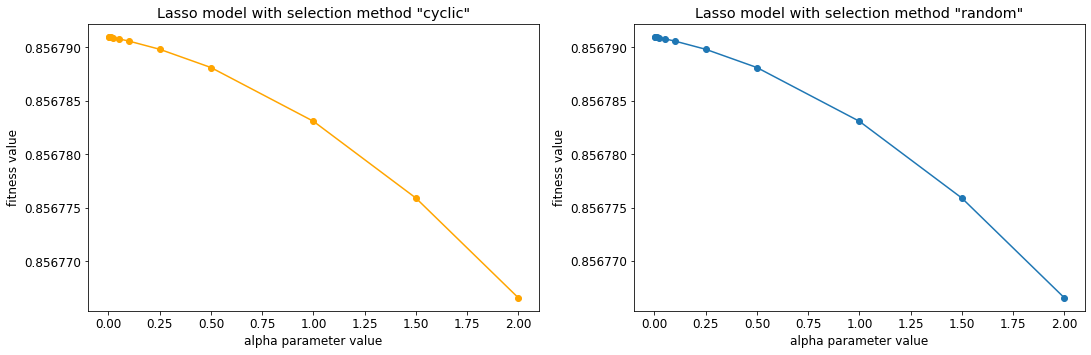

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.tight_layout(pad = 5)

ax[0].scatter(alphas_l, lasso_results[:len(alphas_l)], color="orange")
ax[0].plot(alphas_l, lasso_results[:len(alphas_l)], color="orange")
ax[1].scatter(alphas_l, lasso_results[len(alphas_l):])
ax[1].plot(alphas_l, lasso_results[len(alphas_l):])
ax[0].set_title('Lasso model with selection method "cyclic"')
ax[1].set_title('Lasso model with selection method "random"')
for ax in [ax[0], ax[1]]:
  ax.get_yaxis().get_major_formatter().set_useOffset(False)
  ax.set_xlabel('alpha parameter value')
  ax.set_ylabel('fitness value')
plt.show()

Parametr $\alpha$ jest odpowiedzialny za skalowanie kary $\text{L}1$ w tworzonym modelu. Gdy mamy parametr $\alpha = 0$, to model jest zwykłą regresją liniową.

Widzimy, że model regresji liniowej osiąga lekko większy wynik dopasowania niż model Lasso przy standardowych parametrach, a szukanie wartości parametrów $\alpha$ oraz metody wybierania poprawianej zmiennej nie polepsza, ani nie pogarsza wyniku modelu.

Możemy na tej podstawie wnioskować, że dołożenie kary $\text{L}1$ nie działa na korzyść naszych modeli.

## Model regresji Elastic Net

Skoro dokładanie kary $\text{L}1$ nie zdało się na nic dobrego, to zobaczmy jak ruszanie parametrem odpowiedzialnym za skalowanie kary $\text{L}2$ wpłynie na nasz model.

Warto zauważyć, że przy wszystkich wcześniej wykonanych testach model liniowy osiągał najlepszy wynik, a modele uwzględniające jakąkolwiek dodatkową karę osiągały wyniki mniejsze. Dodatkowo im więcej kar dokładaliśmy, tym gorszy wynik osiągał testowany model.

Wartości listy `alphas_en` odpowiadają to przez jaką wartość będzie skalowana kara modelu, a lista `ratios` zawiera wartości parametru służącemu wskazaniu jak dużą częścią całej kary w modelu będzie kara $\text{L}1$. W przypadku gdy `ratio=0` to model kara tylko za pomocą $\text{L}2$.

In [ ]:
alphas_en = [0.01, 0.1, 0.5, 0.75, 1]
ratios = [i/5 for i in range(0, 5)]
ratios

[0.0, 0.2, 0.4, 0.6, 0.8]

In [ ]:
en_results = []
best_result_en = 0
best_alpha_en = alphas_en[0]
best_ratio_en = ratios[0]
for p_alpha in alphas_en:
  for p_ratio in ratios:
    en_reg = linear_model.ElasticNet(alpha = p_alpha, l1_ratio=p_ratio, random_state=0)
    en_reg.fit(train_X, train_Y)
    result = en_reg.score(test_X, test_Y)
    en_results.append(result)
    if result > best_result_en:
      best_result_en = result
      best_alpha = p_alpha
      best_ratio_en = p_ratio

In [ ]:
print(f"Metoda Elastic Net uzyskała najlepszy wynik {round(best_result_en, 6)} dla parametrów alpha={best_alpha_en}, l1_ratio={best_ratio_en}.")

Metoda Elastic Net uzyskała najlepszy wynik 0.856754 dla parametrów alpha=0.01, l1_ratio=0.8.


Sprawdźmy jak ruszanie parametrem `l1_ratio` wpłynie na wynik naszego modelu.

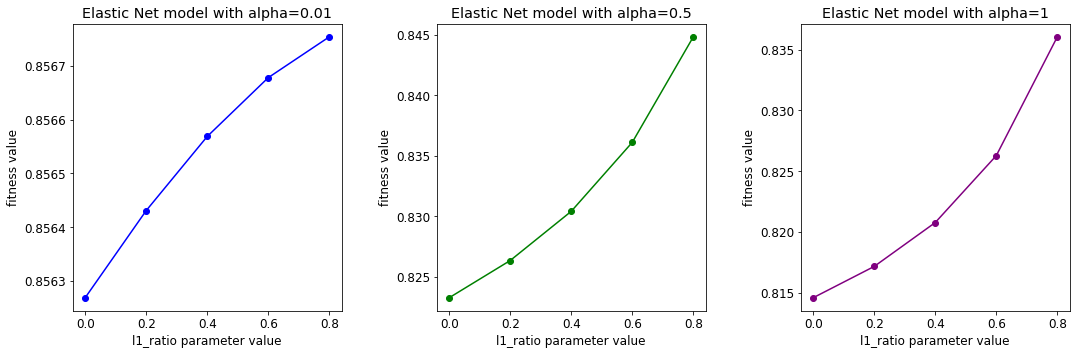

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(16, 6))
fig.tight_layout(pad = 5)

ax[0].scatter(ratios, en_results[:5], color="blue")
ax[0].plot(ratios, en_results[:5], color="blue")
ax[1].scatter(ratios, en_results[10:15], color="green")
ax[1].plot(ratios, en_results[10:15], color="green")
ax[2].scatter(ratios, en_results[20:25], color="purple")
ax[2].plot(ratios, en_results[20:25], color="purple")
for i in range(3):
  ax[i].set_title(f'Elastic Net model with alpha={alphas_en[2*i]}')
  ax[i].get_yaxis().get_major_formatter().set_useOffset(False)
  ax[i].set_xlabel('l1_ratio parameter value')
  ax[i].set_ylabel('fitness value')
plt.show()

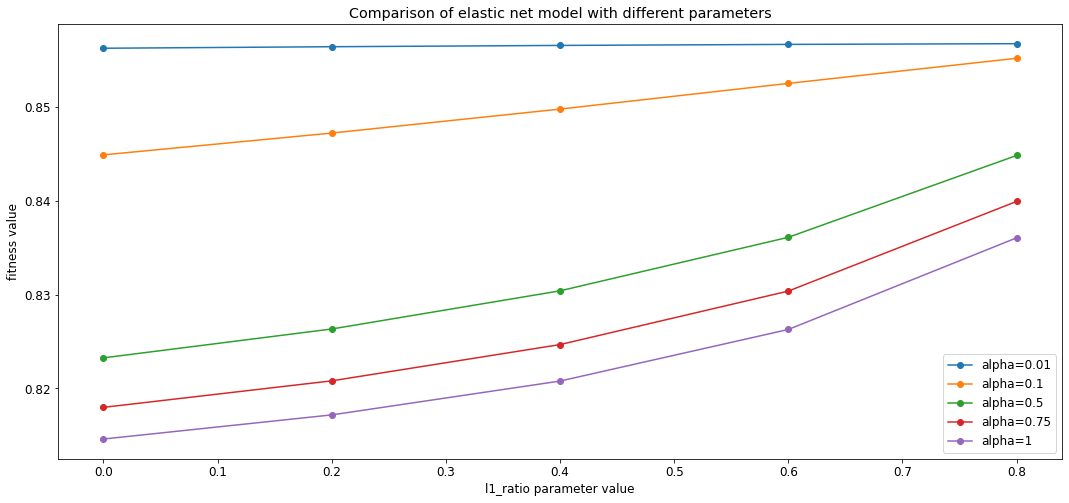

In [ ]:
for i in range(5):
  plt.plot(ratios, en_results[i * 5 : (i + 1) * 5], '-o', label=f'alpha={alphas_en[i]}')
plt.ylabel('fitness value')
plt.xlabel('l1_ratio parameter value')
plt.legend(loc="lower right")
plt.rcParams["figure.figsize"] = (18, 8)
plt.title("Comparison of elastic net model with different parameters")
plt.show()

Wynik tego testu sugeruje że dokładanie i korzystanie z kary $\text{L}2$ jest jeszcze gorszym pomysłem niż dokładanie samej kary $\text{L}1$.
Im mniej karamy nasz model (parametr $\alpha$) oraz im mniej w tej karze jest kary $\text{L}2$, tym lepszy jest nasz model.

## Dodatek

W ramach sprawdzenia jak bardzo jeszcze można polepszyć naszą predykcję na wybranym zbiorze danych to do grona konkurentów dopuszczamy sieć neuronową.

Sieć neuronowa opiera się na bardzo podobnej zasadzie co regresja liniowa, jednak ta odbywa się w pojedynczym neuronie. Do wyniku takiej "mini resgresji" jest przykładana wybrana funkcja aktywacji i jej wartośc jest przekazywana do następnych neuronów, aż na końcu dostajemy wyjście z pojedynczego neurona będące naszą predykcją.

Wagi w poszczególnych neuronach są modyfikowane na podstawie wyliczania w jak dużej części przyczyniły się one do ogólnego błędu predykcji ostatniego neurona i wszystkich neuronów po drodze. Algorytmem który umożliwia nam to działanie jest wspaniała propagacja wsteczna.

In [ ]:
nn_reg = MLPRegressor(random_state=1, max_iter = 10, early_stopping=True)
nn_reg.fit(train_X, train_Y)
result = nn_reg.score(test_X, test_Y)

In [ ]:
result

0.8720244512430723

Nawet bez dobierania parametrów po 10 iteracjach sieć neuronowa była w stanie znaleźć dopasowanie wag, którego dopasowanie do danych wynosi $0.872024$. Jest to już róznica $1.5$ punkta procentowego w porównaniu do najlepszego dotychczas modelu regresji liniowej.

In [ ]:
solvers = ["lbfgs", "sgd", "adam"]
activations = ["identity", "logistic", "tanh", "relu"]

In [ ]:
best_nn = 0
best_solver = solvers[0]
nn_results = []
for p_solver in solvers:
  nn_reg = MLPRegressor(random_state=1, max_iter=50, solver=p_solver, early_stopping=True)
  nn_reg.fit(train_X, train_Y)
  result = nn_reg.score(test_X, test_Y)
  nn_results.append(result)
  if result > best_nn:
    best_nn = result
    best_solver = p_solver

In [ ]:
print(best_solver, best_nn)

adam 0.881042311712326


In [ ]:
best_nn_adam = 0
best_activation = activations[0]
nn_results_adam = []
for p_activation in activations:
  nn_reg = MLPRegressor(random_state=1, max_iter=50, solver="adam", activation=p_activation, early_stopping=True)
  nn_reg.fit(train_X, train_Y)
  result = nn_reg.score(test_X, test_Y)
  nn_results_adam.append(result)
  if result > best_nn_adam:
    best_nn_adam = result
    best_activation = p_activation

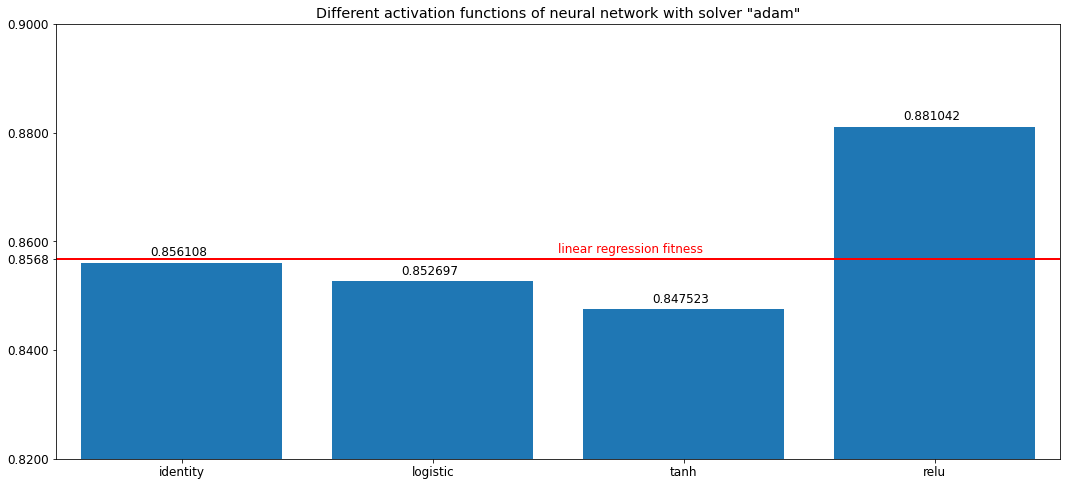

In [ ]:
fig, ax = plt.subplots()
ax.bar(activations, nn_results_adam)
ax.set_yticks([0.82, 0.84, 0.856791, 0.86, 0.88, 0.9])
ax.set_ylim([0.82, 0.9])
ax.set_xlim([-0.5, 3.5])
for i, v in enumerate(nn_results_adam):
    ax.text(i-0.125, v+0.00125, str(round(v, 6)))
ax.hlines(y=0.856791, xmin=-1, xmax=5.5, linewidth=2, color='r')
ax.set_title('Different activation functions of neural network with solver "adam"')
plt.text(1.5, 0.858, 'linear regression fitness', color = 'red')
plt.show()

Choć widzimy, że sieć neuronowa potrafi osiągać wyniki lepsze niż regresja liniowa i jej modyfikacje, to czas uczenia jest w tym przypadku zdecydowanie dłuższy. W przypadku sieci neuronowych cierpi również część tłumacząca działanie modelu. W regresji liniowej wiadomo jak działają wagi i model, a w sieciach neuronowych jest tych wag i neuronów na tyle dużo, że zrozumienie dlaczego sieć podjęła decyzję o akurat takiej predykcji jest zdecydowanie trudniejsze.

## Konkluzje

Na podstawie przeprowadzonych testów widzimy zatem że zdecydowanie najlepiej do obecnych danych dopasowuje się potężna, jednowarstwowa sieć neuronowa. Zdobyła ona poziom dopasowania równy $88.104\%$, co oznacza przewagę aż $2.5$ punktów procentowych nad modelem znajdującym się na drugim miejscu

Na drugim miejscu znajduje się jakże prosty model regresji liniowej wielu zmiennych z wynikiem na poziomie dopasowania równym $85.679\%$

Zaraz za nim w rankingu stoi regresja Lasso, która w naszym przypadku dokłada niekorzystną karę $\text{L}1$.

Na końcu rankingu mamy model regresji Elastic Net, który mając do dyspozycji dwa rodzaje kar ($\text{L}1$ i $\text{L}2$) okazał się najgorzej dopasowanym do danych modelem.